# Facebook Graph

## Importation 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from karateclub import DeepWalk
import  umap
from sklearn.preprocessing import StandardScaler 
import seaborn as sns 
from karateclub import RandomWalker
import gensim
from gensim.models import Word2Vec
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from karateclub.utils.walker import BiasedRandomWalker

data\facebook_edges.csv
data\facebook_features.csv
data\facebook_target.csv


## Lecture de donnees

In [2]:
edglist=pd.read_csv("data/facebook_edges.csv")
targetlist=pd.read_csv("data/facebook_target.csv")
features=pd.read_csv("data/facebook_features.csv")

In [3]:
features.head()


,node_id,feature_id
0,554,2835
1,554,4518
2,554,2198
3,554,2014
4,554,3818


In [4]:
graph=nx.convert_matrix.from_pandas_edgelist(edglist,"id_1","id_2")

In [5]:
g=list(nx.dfs_preorder_nodes(graph,7))[:150]
G=graph.subgraph(g)

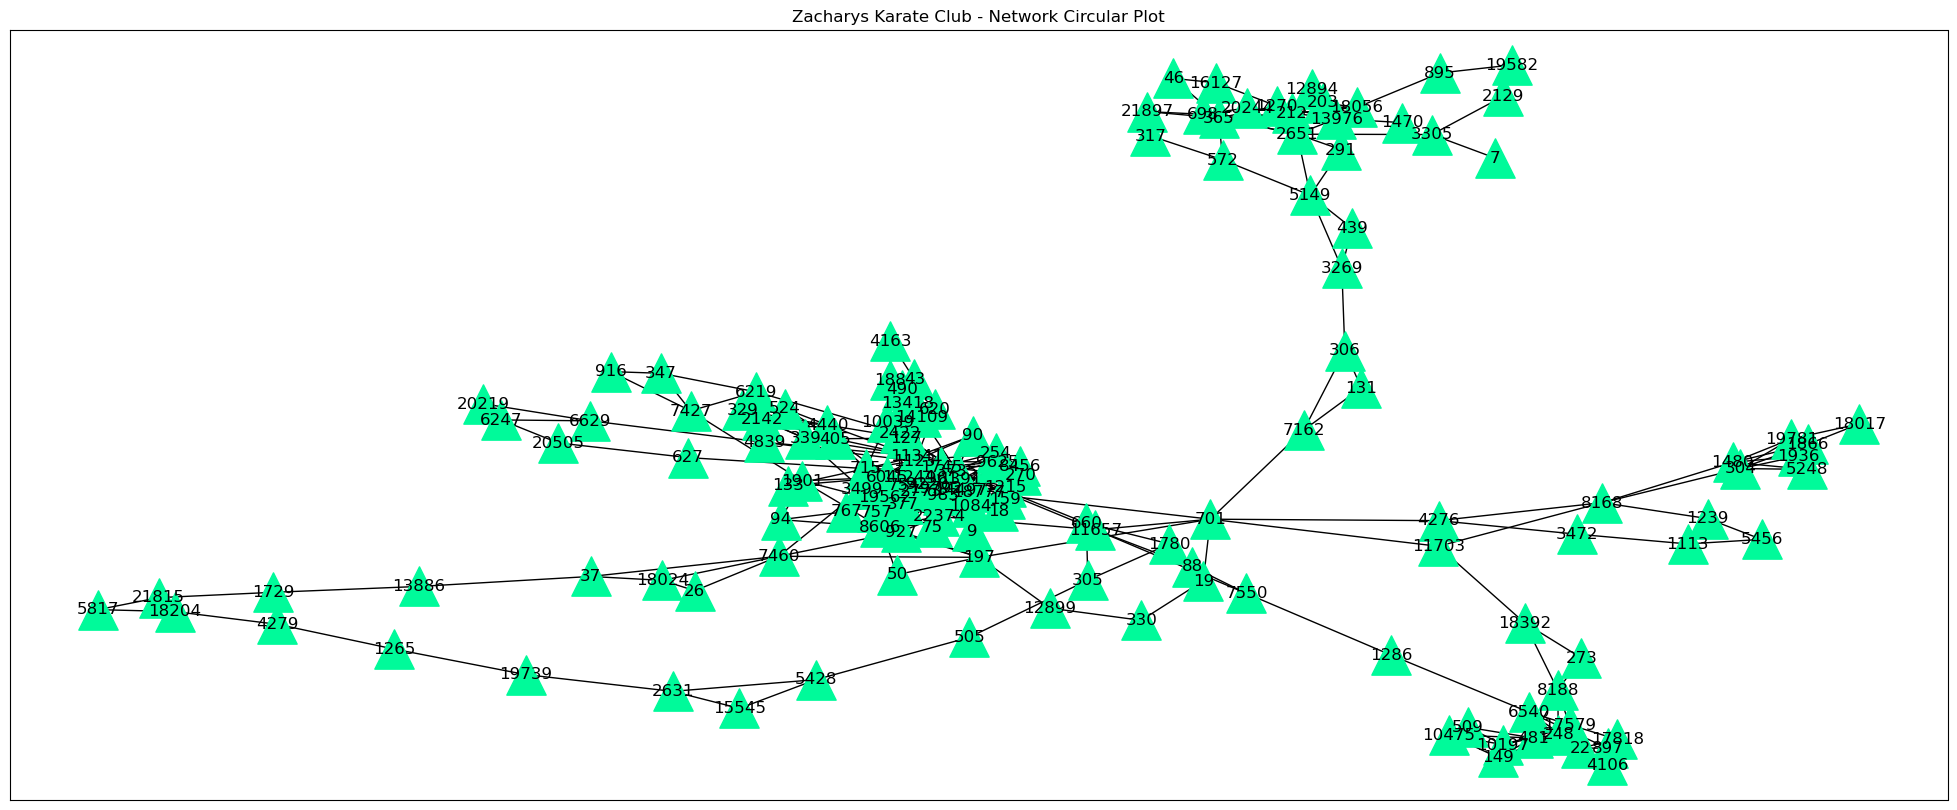

In [6]:
plt.figure(figsize=(25,10))
ax = plt.gca()
ax.set_title('Zacharys Karate Club - Network Circular Plot')
nx.draw_networkx(G, ax=ax, with_labels=True,node_color="mediumspringgreen", node_shape="^", node_size=800)

## RandomWolk

In [7]:
mod=RandomWalker(10,5)
mod.do_walks(G)
var=mod.walks

In [8]:
w2v = gensim.models.Word2Vec(var,
                             hs=1, #use herarchical softmax
                             sg=1) # use skip-gram
embd=w2v.wv.vectors

## Umap

In [9]:
scaledt = StandardScaler().fit_transform(embd)
reducer=umap.UMAP(n_neighbors=5)
embd = reducer.fit_transform(scaledt)
embd.shape

(150, 2)

In [10]:
embd

array([[ 12.93947   ,  10.027056  ],
       [ 14.242009  ,  10.823276  ],
       [  4.4160347 ,   6.767858  ],
       [ 12.7589855 ,  10.100296  ],
       [ 10.605074  ,  28.46218   ],
       [ 12.838447  ,  10.210243  ],
       [ 13.042132  ,   9.168494  ],
       [  4.749731  ,   6.9862695 ],
       [  3.9749794 ,   7.708399  ],
       [ 14.153282  ,  10.918369  ],
       [ 12.942988  ,   9.818168  ],
       [  8.422336  ,   2.1757379 ],
       [ 14.162018  ,  10.38781   ],
       [  2.3782125 ,   0.53977436],
       [ 13.769328  ,   8.645398  ],
       [ 12.973577  ,   9.4505205 ],
       [ 13.013115  ,   2.7373824 ],
       [  4.637521  ,   6.8329024 ],
       [ 13.35804   ,   9.701094  ],
       [ 14.146231  ,  10.013997  ],
       [ 12.729066  ,   2.855936  ],
       [ 10.979022  , -14.213182  ],
       [  8.832296  ,   1.6714776 ],
       [ 17.873177  ,  11.499589  ],
       [ 10.521772  ,  28.40965   ],
       [ 13.143031  ,   9.0424    ],
       [  8.69261   ,   1.8300525 ],
 

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

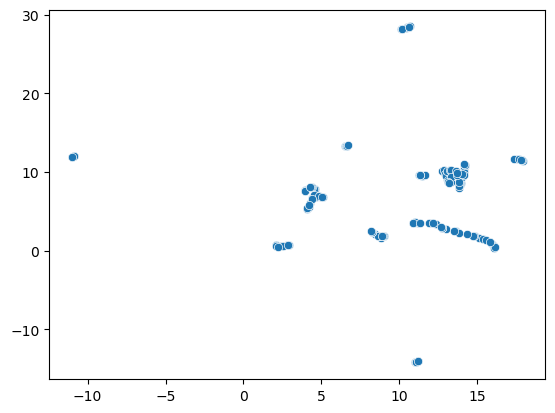

In [11]:
sns.scatterplot(embd[:,0],embd[:,1])

In [12]:
L=w2v.wv.most_similar('7')

In [13]:
L

[('3305', 0.9892513155937195),
 ('2129', 0.960927426815033),
 ('19582', 0.9494462609291077),
 ('895', 0.9433321356773376),
 ('18056', 0.8459368348121643),
 ('212', 0.8176575899124146),
 ('13976', 0.8163766860961914),
 ('1470', 0.813671886920929),
 ('2651', 0.7964527010917664),
 ('12894', 0.7909083366394043)]

In [14]:
Cs=[]
for x in L:
    Cs.append(targetlist.loc[int(x[0]),"page_type"])

In [15]:
Cs

['politician',
 'politician',
 'politician',
 'politician',
 'politician',
 'politician',
 'politician',
 'politician',
 'government',
 'politician']

## Random Forest Classifier 

0.9333333333333333
[[0.88888889 0.11111111 0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [1.         0.         0.         0.        ]]


(array([[2., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [2., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [3., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [4., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 4 BarContainer objects>)

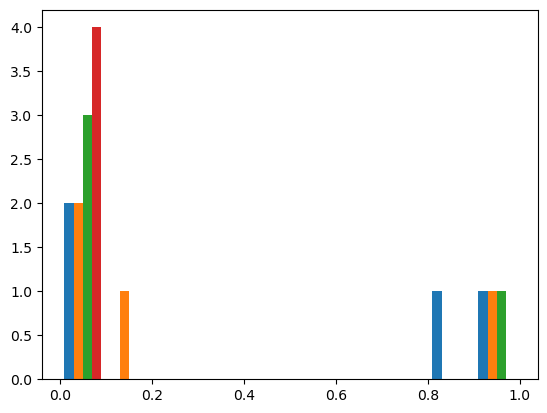

In [16]:
# Get targets 
y= targetlist.loc[ [int(x) for x in g],'page_type']
# Get corresponding embeddings
X_dw = []
for i in y.index:
    X_dw.append(w2v.wv.__getitem__(str(i)))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_dw, y, test_size=0.2) 

# Train RF model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate
print(f1_score(y_test, y_pred, average='micro'))
print(confusion_matrix(y_test, y_pred, normalize='true'))
plt.hist(confusion_matrix(y_test, y_pred, normalize='true'))

#F1 Score: ~ 0.93

## BiasedRandomwalker 

In [17]:
# Biased random walks
b_walker = BiasedRandomWalker(80, 10, 0.5, 0.25)
b_walker.do_walks(G)

# Train skipgram
node_vec = Word2Vec(b_walker.walks,  # generated walks
                 hs=1,  # use hierarchical softmax
                 sg = 1,  # use skip-gram
                 window=10,
                 min_count=1)



## Random Forest Classifier 

0.8666666666666667
[[1.         0.         0.         0.        ]
 [0.05882353 0.88235294 0.05882353 0.        ]
 [0.         0.         1.         0.        ]
 [1.         0.         0.         0.        ]]


(array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 2.],
        [3., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [3., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [4., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 4 BarContainer objects>)

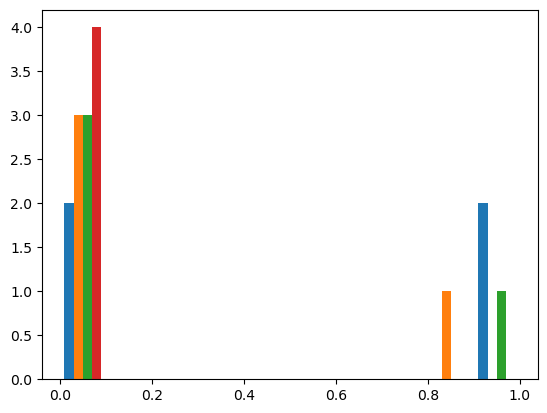

In [18]:
# Get corresponding Node2Vec embeddings
X_node_vec = []
for i in y.index:
    X_node_vec.append(node_vec.wv.__getitem__(str(i)))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_node_vec, y, test_size=0.2) # train/test split

# Train RF
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))
print(confusion_matrix(y_test, y_pred, normalize='true'))
plt.hist(confusion_matrix(y_test, y_pred, normalize='true'))


#F1 Score: ~0.83